In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
salary_train = pd.read_csv(r"C:\Users\Lenovo\Documents\Assignments\SalaryData_Test.csv")


In [8]:
salary_test = pd.read_csv(r"C:/Users/Lenovo/Documents/Assignments/SalaryData_Train.csv")


In [9]:
string_columns=["age", "workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek", "native", "Salary"]

In [10]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
salary_test.shape

(30161, 14)

In [13]:
salary_train.shape

(15060, 14)

In [14]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [15]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [16]:
occupation_set = set(salary_train['occupation'])
print(occupation_set)

{' Sales', ' Farming-fishing', ' Craft-repair', ' Adm-clerical', ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners', ' Other-service', ' Exec-managerial', ' Tech-support', ' Prof-specialty', ' Machine-op-inspct', ' Armed-Forces', ' Protective-serv'}


In [17]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
salary_train.age = salary_train.age.astype(float)
salary_train['hoursperweek'] = salary_train['hoursperweek'].astype(float)

In [20]:
salary_test.age = salary_test.age.astype(float)
salary_test['hoursperweek'] = salary_test['hoursperweek'].astype(float)

In [21]:
salarytrain_df = salary_train.dropna()

In [22]:
salarytest_df = salary_test.dropna()

In [23]:

salarytrain_df['predclass'] = salarytrain_df['Salary']
del salarytrain_df['Salary']
salarytrain_df['educationno'] = salarytrain_df['educationno']
del salarytrain_df['educationno']

In [24]:
salarytest_df['predclass'] = salarytest_df['Salary']
del salarytest_df['Salary']
salarytest_df['educationno'] = salarytest_df['educationno']
del salarytest_df['educationno']

In [25]:
salarytrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 15059
Data columns (total 13 columns):
age              15060 non-null float64
workclass        15060 non-null object
education        15060 non-null object
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null float64
native           15060 non-null object
predclass        15060 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1.6+ MB


In [26]:
salarytest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 30160
Data columns (total 13 columns):
age              30161 non-null float64
workclass        30161 non-null object
education        30161 non-null object
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null float64
native           30161 non-null object
predclass        30161 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 3.2+ MB


In [27]:
salarytest_df.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
predclass        0
dtype: int64

In [28]:
print('workclass',salarytrain_df.workclass.unique())
print('education',salarytrain_df.education.unique())
print('maritalstatus',salarytrain_df['maritalstatus'].unique())
print('occupation',salarytrain_df.occupation.unique())
print('relationship',salarytrain_df.relationship.unique())
print('race',salarytrain_df.race.unique())
print('sex',salarytrain_df.sex.unique())
print('native',salarytrain_df['native'].unique())
print('predclass',salarytrain_df.predclass.unique())

workclass [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
education [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
occupation [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
relationship [' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']
race [' Black' ' White' ' Other' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander']
sex [' Male' ' Female']
native [' United-States' ' Peru' ' Guatemala' ' Mexico' ' Dominican-Republic'
 ' Ireland'

In [29]:
print('workclass',salarytest_df.workclass.unique())
print('education',salarytest_df.education.unique())
print('maritalstatus',salarytest_df['maritalstatus'].unique())
print('occupation',salarytest_df.occupation.unique())
print('relationship',salarytest_df.relationship.unique())
print('race',salarytest_df.race.unique())
print('sex',salarytest_df.sex.unique())
print('native',salarytest_df['native'].unique())
print('predclass',salarytest_df.predclass.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [30]:
predclass1 = salarytrain_df[salarytrain_df['predclass'] == 1]
predclass0 = salarytrain_df[salarytrain_df['predclass'] == 0]

In [31]:
predclass1 = salarytest_df[salarytest_df['predclass'] == 1]
predclass0 = salarytest_df[salarytest_df['predclass'] == 0]

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

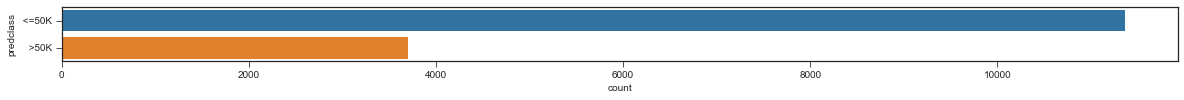

In [33]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=salarytrain_df)

In [34]:
salary_train[['education', 'educationno']].groupby(['education'], as_index=False).mean().sort_values(by='educationno', ascending=False)

,education,educationno
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


In [35]:
salary_test[['education', 'educationno']].groupby(['education'], as_index=False).mean().sort_values(by='educationno', ascending=False)

,education,educationno
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


In [36]:
salarytrain_df['education'].replace('Preschool', 'dropout',inplace=True)
salarytrain_df['education'].replace('10th', 'dropout',inplace=True)
salarytrain_df['education'].replace('11th', 'dropout',inplace=True)
salarytrain_df['education'].replace('12th', 'dropout',inplace=True)
salarytrain_df['education'].replace('1st-4th', 'dropout',inplace=True)
salarytrain_df['education'].replace('5th-6th', 'dropout',inplace=True)
salarytrain_df['education'].replace('7th-8th', 'dropout',inplace=True)
salarytrain_df['education'].replace('9th', 'dropout',inplace=True)
salarytrain_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
salarytrain_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
salarytrain_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
salarytrain_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
salarytrain_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
salarytrain_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
salarytrain_df['education'].replace('Masters', 'Masters',inplace=True)
salarytrain_df['education'].replace('Prof-school', 'Masters',inplace=True)
salarytrain_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [37]:
salarytest_df['education'].replace('Preschool', 'dropout',inplace=True)
salarytest_df['education'].replace('10th', 'dropout',inplace=True)
salarytest_df['education'].replace('11th', 'dropout',inplace=True)
salarytest_df['education'].replace('12th', 'dropout',inplace=True)
salarytest_df['education'].replace('1st-4th', 'dropout',inplace=True)
salarytest_df['education'].replace('5th-6th', 'dropout',inplace=True)
salarytest_df['education'].replace('7th-8th', 'dropout',inplace=True)
salarytest_df['education'].replace('9th', 'dropout',inplace=True)
salarytest_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
salarytest_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
salarytest_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
salarytest_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
salarytest_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
salarytest_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
salarytest_df['education'].replace('Masters', 'Masters',inplace=True)
salarytest_df['education'].replace('Prof-school', 'Masters',inplace=True)
salarytest_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

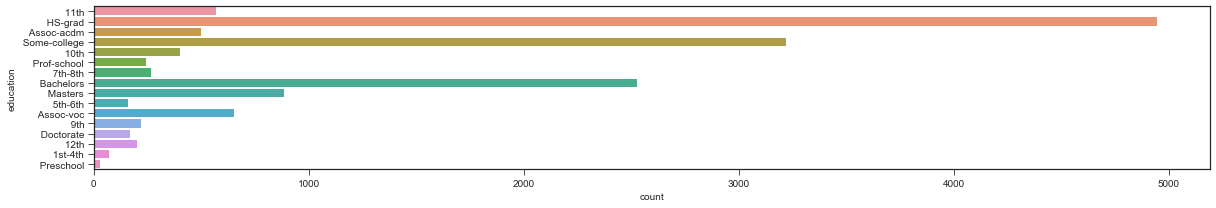

In [38]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=salarytrain_df)

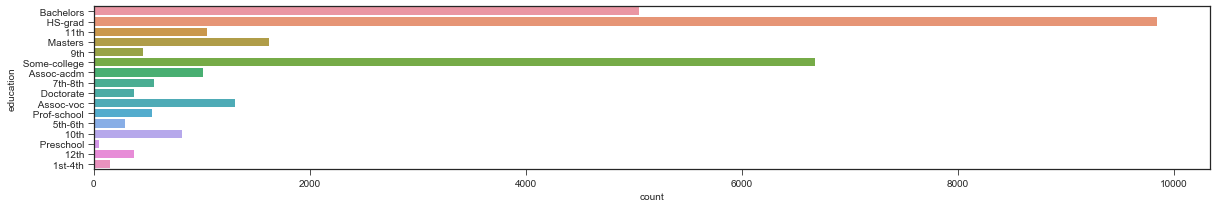

In [39]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=salarytest_df)

In [40]:
salarytrain_df['maritalstatus'].replace('Never-married', 'NotMarried',inplace=True)
salarytrain_df['maritalstatus'].replace(['Married-AF-spouse'], 'Married',inplace=True)
salarytrain_df['maritalstatus'].replace(['Married-civ-spouse'], 'Married',inplace=True)
salarytrain_df['maritalstatus'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
salarytrain_df['maritalstatus'].replace(['Separated'], 'Separated',inplace=True)
salarytrain_df['maritalstatus'].replace(['Divorced'], 'Separated',inplace=True)
salarytrain_df['maritalstatus'].replace(['Widowed'], 'Widowed',inplace=True)

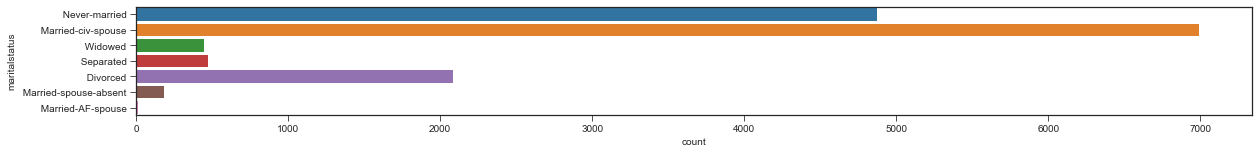

In [41]:

fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=salarytrain_df)

In [42]:
salarytest_df['maritalstatus'].replace('Never-married', 'NotMarried',inplace=True)
salarytest_df['maritalstatus'].replace(['Married-AF-spouse'], 'Married',inplace=True)
salarytest_df['maritalstatus'].replace(['Married-civ-spouse'], 'Married',inplace=True)
salarytest_df['maritalstatus'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
salarytest_df['maritalstatus'].replace(['Separated'], 'Separated',inplace=True)
salarytest_df['maritalstatus'].replace(['Divorced'], 'Separated',inplace=True)
salarytest_df['maritalstatus'].replace(['Widowed'], 'Widowed',inplace=True)

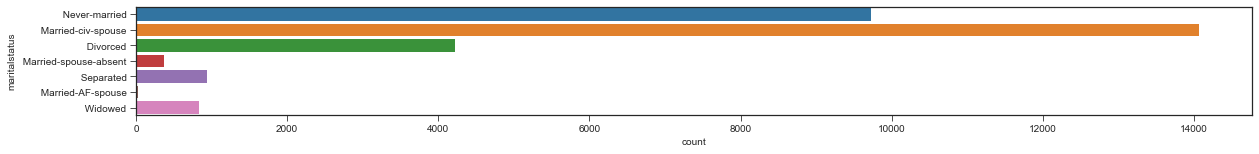

In [43]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=salarytest_df)

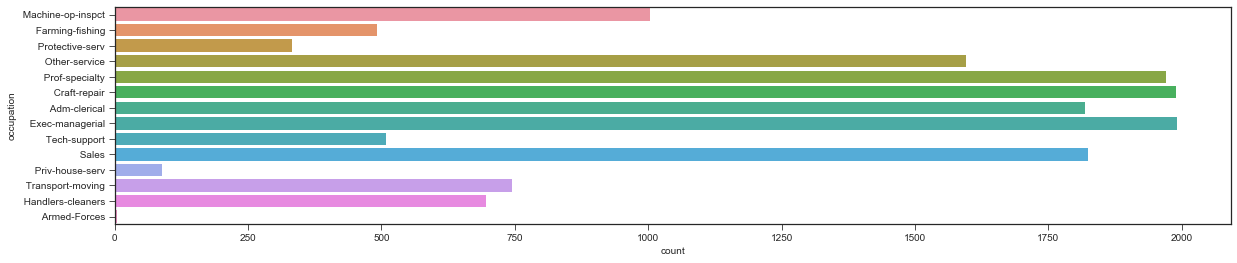

In [45]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=salarytrain_df)

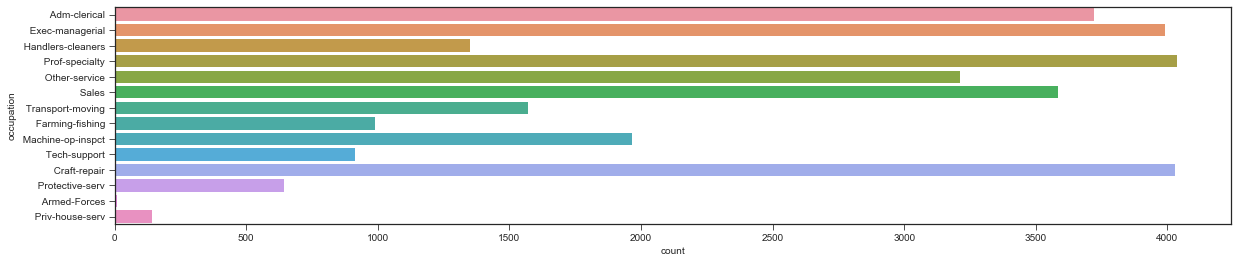

In [46]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=salarytest_df)


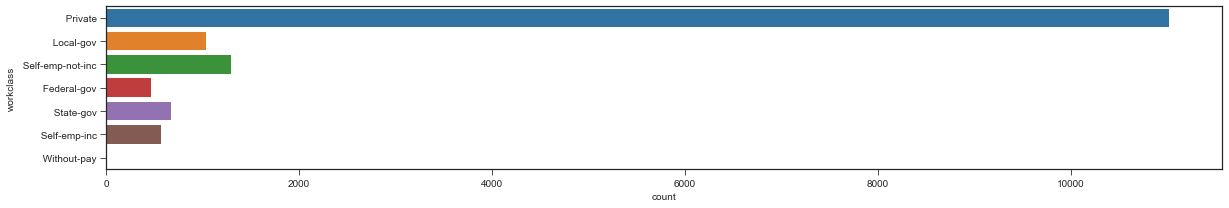

In [47]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=salarytrain_df)

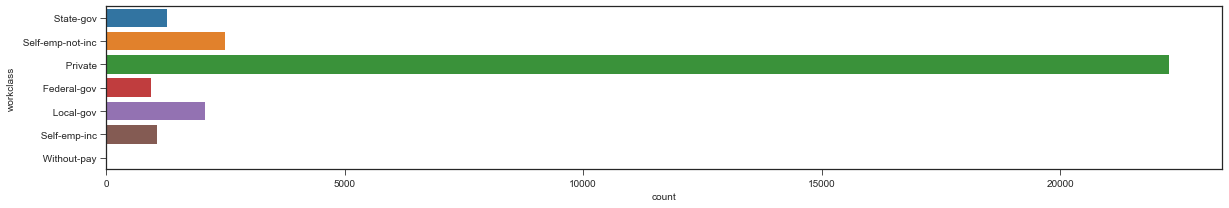

In [48]:
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=salarytest_df)

In [49]:
salarytrain_df['age_bin'] = pd.cut(salarytrain_df['age'], 20)

In [50]:
salarytest_df['age_bin'] = pd.cut(salarytest_df['age'], 20)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


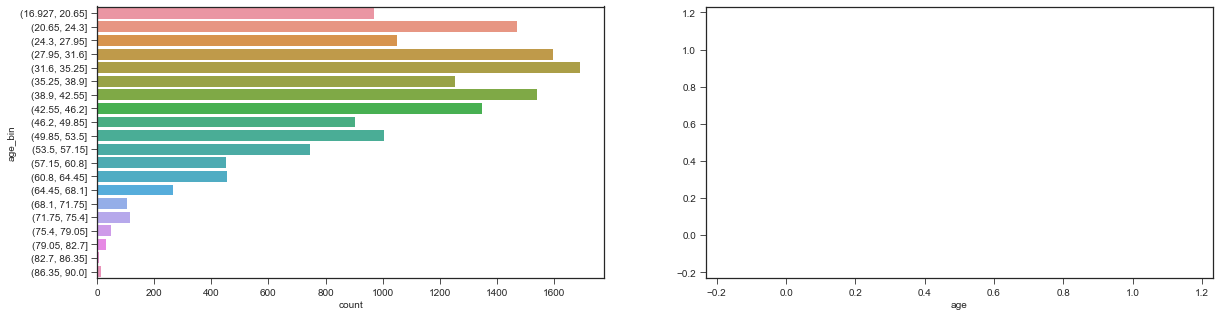

In [51]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=salarytrain_df)
plt.subplot(1, 2, 2)
sns.distplot(salarytrain_df[salarytrain_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(salarytrain_df[salarytrain_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


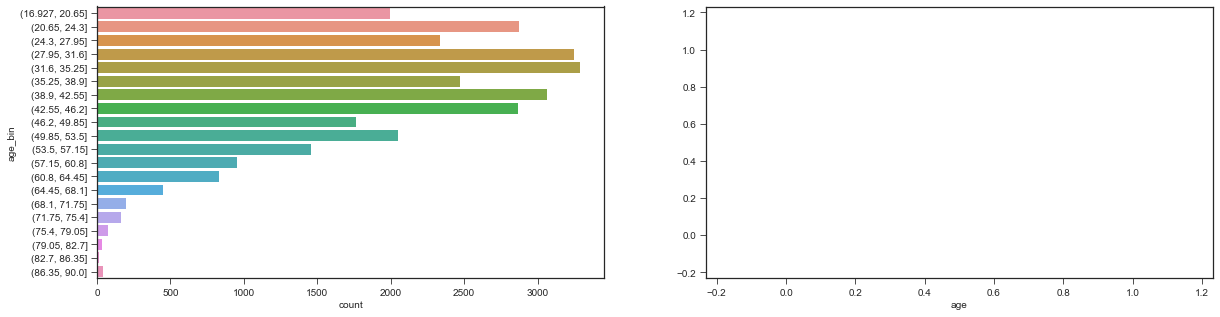

In [52]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=salarytest_df)
plt.subplot(1, 2, 2)
sns.distplot(salarytest_df[salarytest_df['predclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(salarytest_df[salarytest_df['predclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [53]:
salarytrain_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,44.101351
0,<=50K,37.031338


In [54]:
salarytest_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,43.959110
0,<=50K,36.608264


<Figure size 1440x360 with 0 Axes>

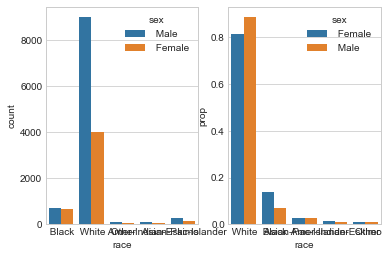

In [55]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=salarytrain_df, ax=axes[0])

prop_df = (salarytrain_df[x]
           .groupby(salarytrain_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

<Figure size 1440x360 with 0 Axes>

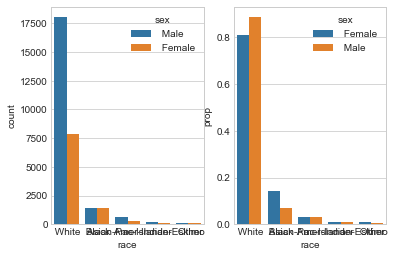

In [56]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=salarytest_df, ax=axes[0])

prop_df = (salarytest_df[x]
           .groupby(salarytest_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [57]:
salarytrain_df['hoursperweek_bin'] = pd.cut(salarytrain_df['hoursperweek'], 10)
salarytrain_df['hoursperweek'] = salarytrain_df['hoursperweek']

In [58]:
salarytest_df['hoursperweek_bin'] = pd.cut(salarytest_df['hoursperweek'], 10)
salarytest_df['hoursperweek'] = salarytest_df['hoursperweek']

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20, 60)

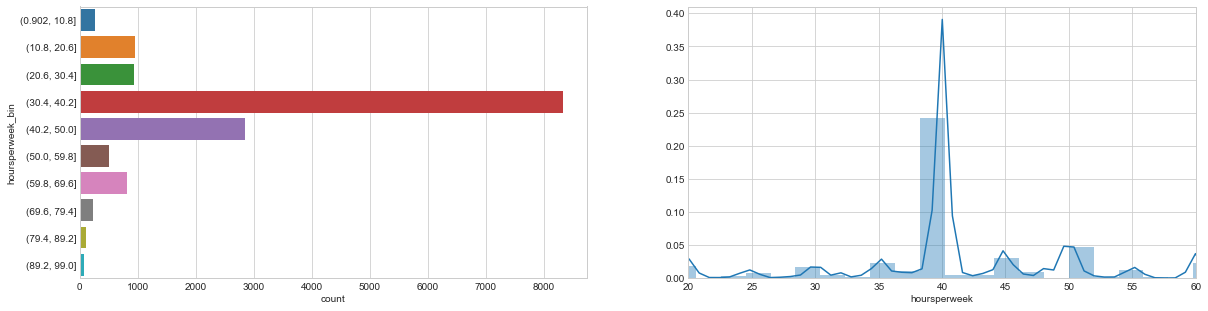

In [59]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hoursperweek_bin", data=salarytrain_df);
plt.subplot(1, 2, 2)
sns.distplot(salarytrain_df['hoursperweek']);
sns.distplot(salarytrain_df[salarytrain_df['predclass'] == '>50K']['hoursperweek'], kde_kws={"label": ">$50K"})
sns.distplot(salarytrain_df[salarytrain_df['predclass'] == '<=50K']['hoursperweek'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20, 60)

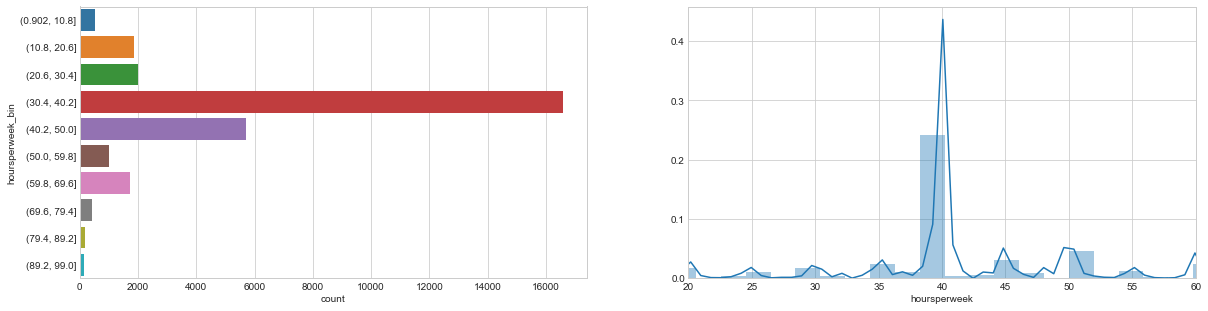

In [60]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hoursperweek_bin", data=salarytest_df);
plt.subplot(1, 2, 2)
sns.distplot(salarytest_df['hoursperweek']);
sns.distplot(salarytest_df[salarytest_df['predclass'] == '>50K']['hoursperweek'], kde_kws={"label": ">$50K"})
sns.distplot(salarytest_df[salarytest_df['predclass'] == '<=50K']['hoursperweek'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


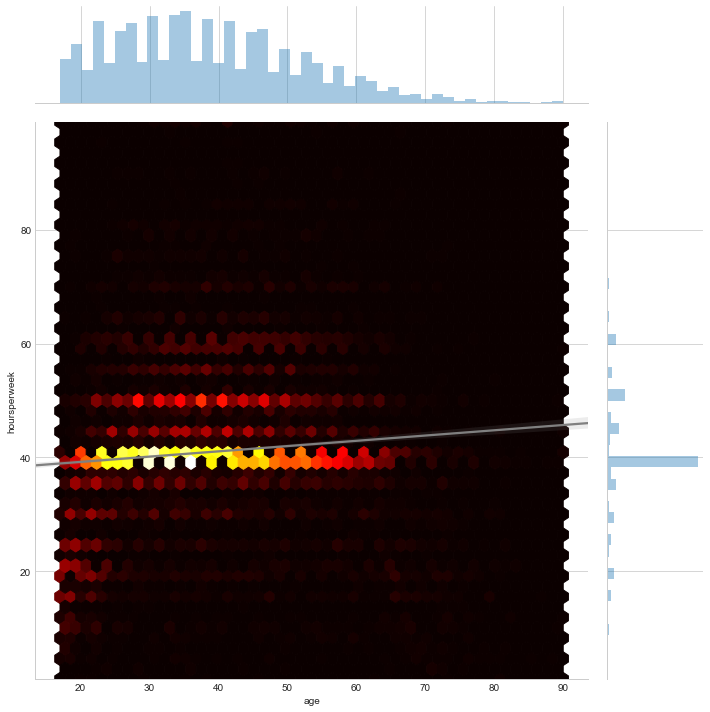

In [61]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = salarytrain_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(salarytrain_df.age, salarytrain_df['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

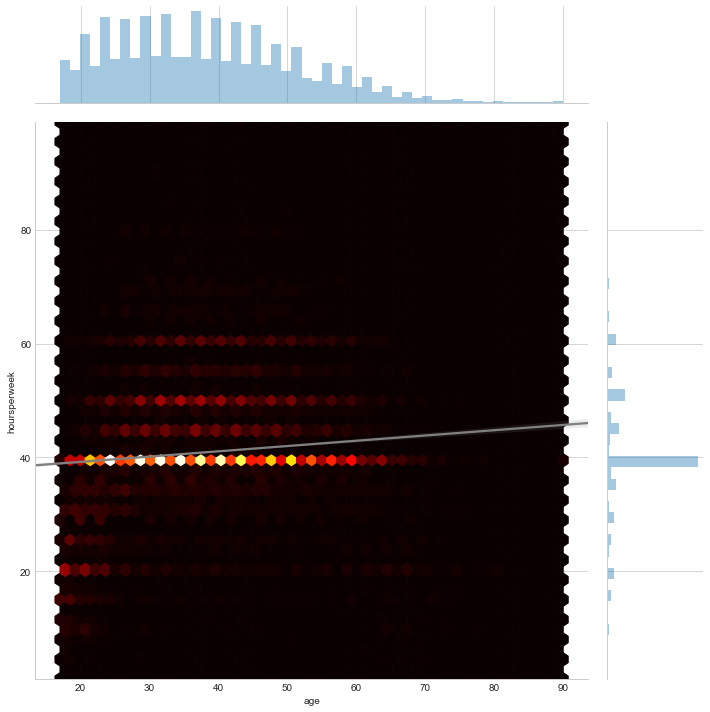

In [62]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = salarytest_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(salarytest_df.age, salarytest_df['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

In [63]:
salarytrain_df['age-hours'] = salarytrain_df['age']*salarytrain_df['hoursperweek']
salarytrain_df['age-hours_bin'] = pd.cut(salarytrain_df['age-hours'], 10)

In [64]:
salarytest_df['age-hours'] = salarytest_df['age']*salarytest_df['hoursperweek']
salarytest_df['age-hours_bin'] = pd.cut(salarytest_df['age-hours'], 10)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


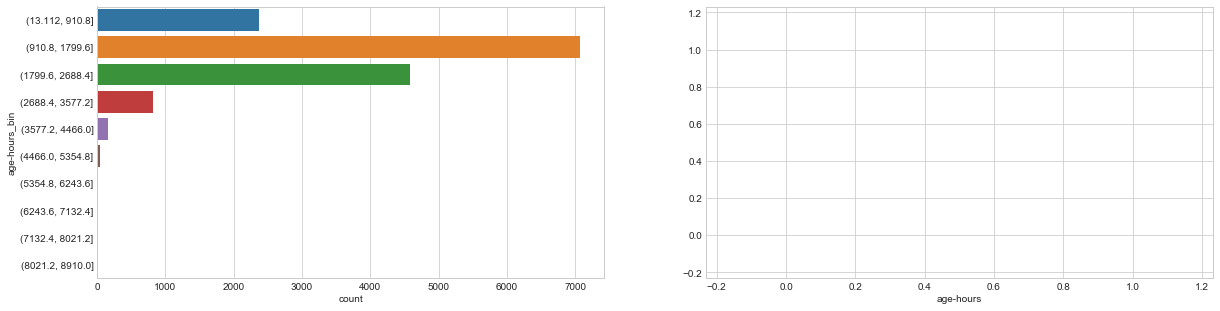

In [65]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=salarytrain_df);
plt.subplot(1, 2, 2)
sns.distplot(salarytrain_df[salarytrain_df['predclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(salarytrain_df[salarytrain_df['predclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


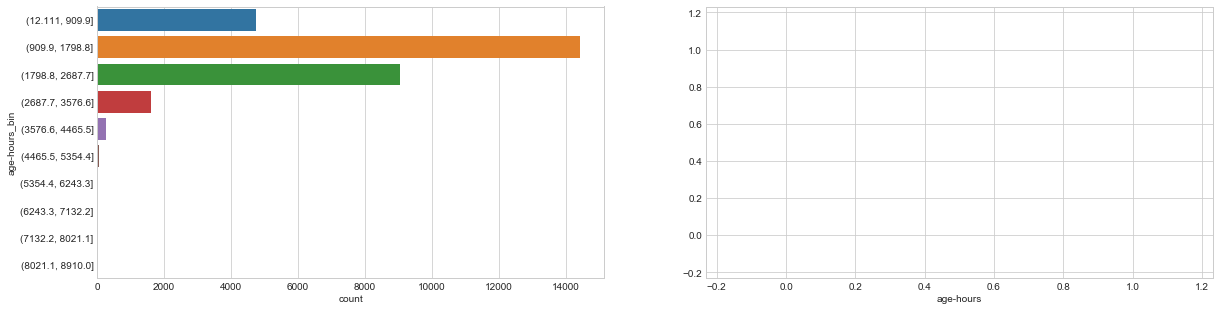

In [66]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=salarytest_df);
plt.subplot(1, 2, 2)
sns.distplot(salarytest_df[salarytest_df['predclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(salarytest_df[salarytest_df['predclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


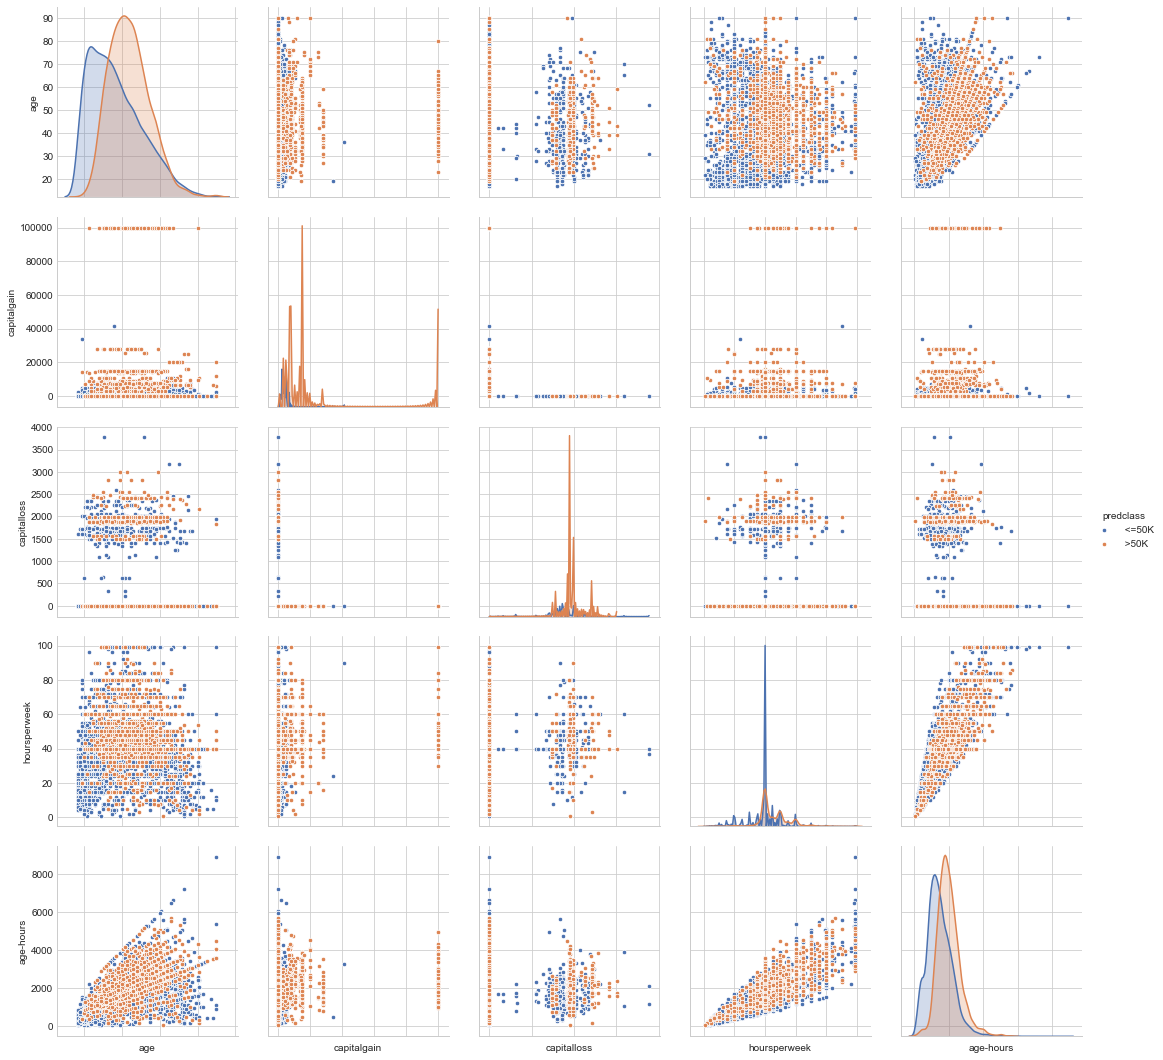

In [67]:
pp = sns.pairplot(salarytrain_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

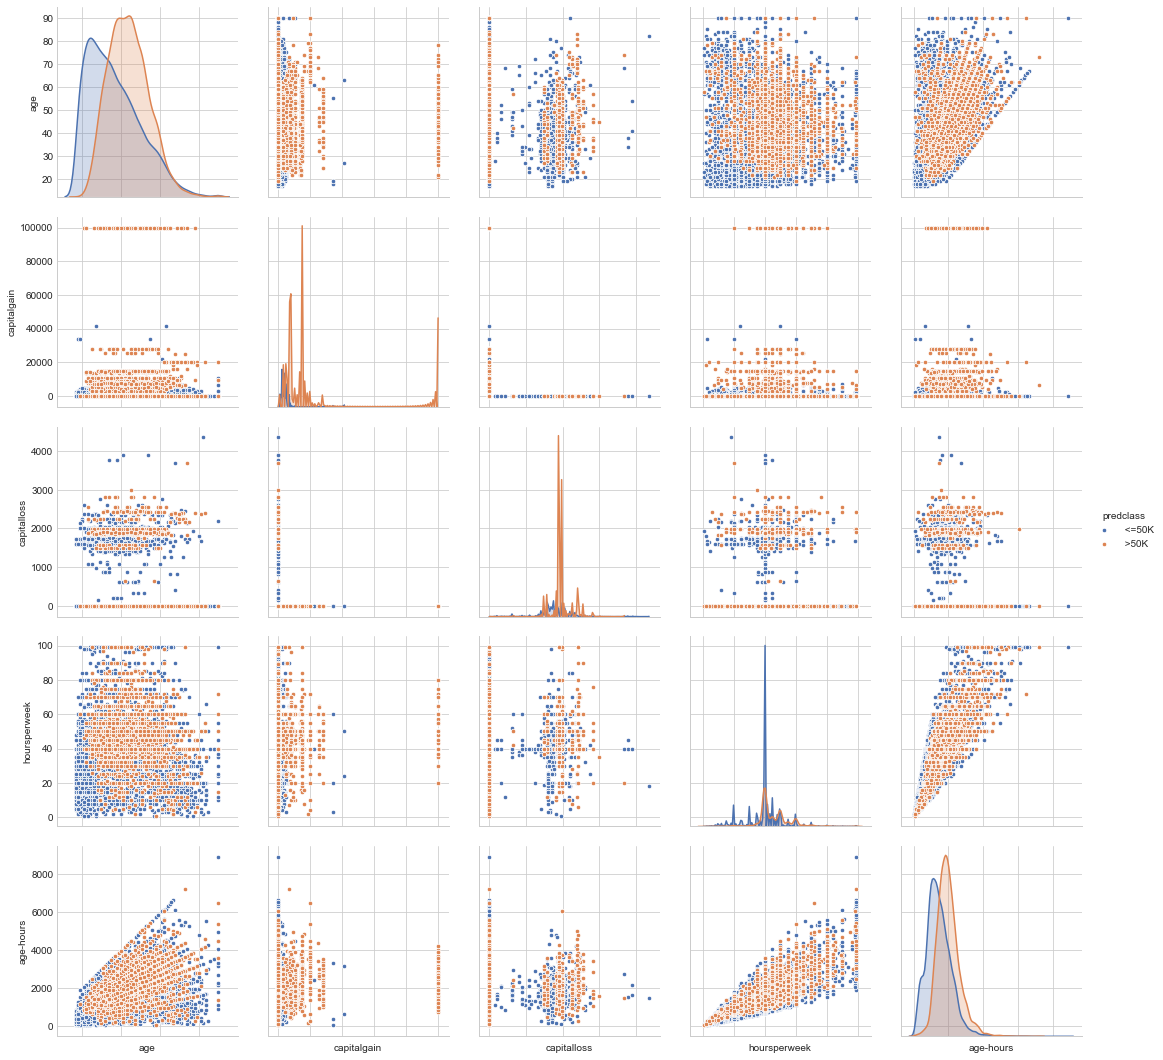

In [68]:
pp = sns.pairplot(salarytest_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

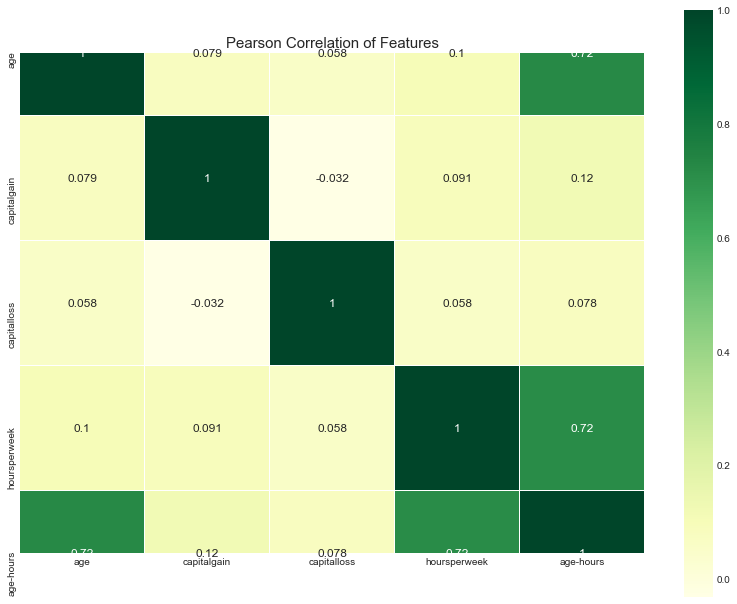

In [69]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(salarytrain_df)

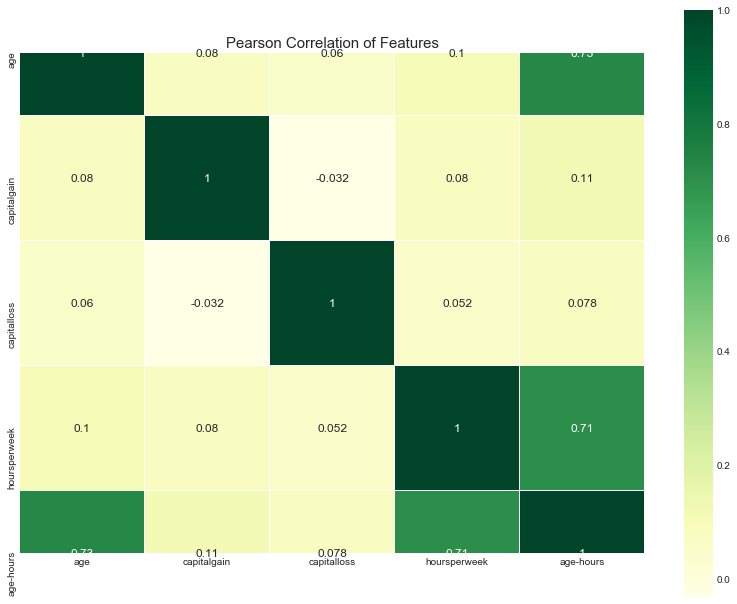

In [70]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(salarytest_df)

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [72]:
salarytrain_df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,predclass,age_bin,hoursperweek_bin,age-hours,age-hours_bin
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1000.0,"(910.8, 1799.6]"
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]",1900.0,"(1799.6, 2688.4]"
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K,"(27.95, 31.6]","(30.4, 40.2]",1120.0,"(910.8, 1799.6]"
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K,"(42.55, 46.2]","(30.4, 40.2]",1760.0,"(910.8, 1799.6]"
4,34.0,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30.0,United-States,<=50K,"(31.6, 35.25]","(20.6, 30.4]",1020.0,"(910.8, 1799.6]"


In [73]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

In [74]:
salarytrain_df = salarytrain_df.apply(LabelEncoder().fit_transform)
salarytrain_df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,predclass,age_bin,hoursperweek_bin,age-hours,age-hours_bin
0,8,2,1,4,6,3,2,1,0,0,39,37,0,2,3,323,1
1,21,2,11,2,4,0,4,1,0,0,49,37,0,5,4,608,2
2,11,1,7,2,10,0,4,1,0,0,39,37,1,3,3,366,1
3,27,2,15,2,6,0,2,1,87,0,39,37,1,7,3,565,1
4,17,2,0,4,7,1,4,1,0,0,29,37,0,4,2,330,1


In [75]:
salarytest_df = salarytest_df.apply(LabelEncoder().fit_transform)
salarytest_df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,predclass,age_bin,hoursperweek_bin,age-hours,age-hours_bin
0,22,5,9,4,0,1,4,1,24,0,39,37,0,6,3,589,1
1,33,4,9,2,3,0,4,1,0,0,12,37,0,9,1,257,0
2,21,2,11,0,5,1,4,1,0,0,39,37,0,5,3,578,1
3,36,2,1,2,5,0,2,1,0,0,39,37,0,9,3,766,2
4,11,2,9,2,9,5,2,0,0,0,39,4,0,3,3,437,1


In [76]:
drop_elements = ['education', 'native', 'predclass', 'age_bin', 'age-hours_bin','hoursperweek_bin']
y = salarytrain_df["predclass"]
X = salarytrain_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,age-hours
0,8,2,4,6,3,2,1,0,0,39,323
1,21,2,2,4,0,4,1,0,0,49,608
2,11,1,2,10,0,4,1,0,0,39,366
3,27,2,2,6,0,2,1,87,0,39,565
4,17,2,4,7,1,4,1,0,0,29,330


In [77]:
drop_elements = ['education', 'native', 'predclass', 'age_bin', 'age-hours_bin','hoursperweek_bin']
y = salarytest_df["predclass"]
X = salarytest_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,age-hours
0,22,5,4,0,1,4,1,24,0,39,589
1,33,4,2,3,0,4,1,0,0,12,257
2,21,2,0,5,1,4,1,0,0,39,578
3,36,2,2,5,0,2,1,0,0,39,766
4,11,2,2,9,5,2,0,0,0,39,437


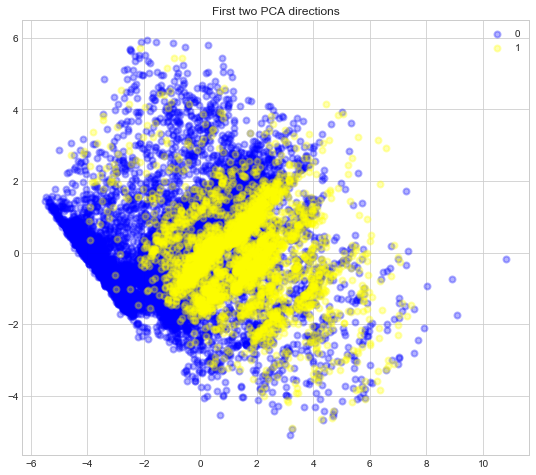

In [81]:
std_scale = preprocessing.StandardScaler().fit(salarytrain_df.drop('predclass', axis=1))
X = std_scale.transform(salarytrain_df.drop('predclass', axis=1))
y = salarytrain_df['predclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');




In [85]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.27823902, 0.39288392, 0.47928417, 0.55134421, 0.61730312,
       0.68026009, 0.74184213, 0.80247902, 0.85770162, 0.91242256,
       0.96370523, 0.9883744 , 0.99602554, 0.99878185, 0.99980708,
       1.        ])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [86]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.6985391766268261

In [89]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7245683930942894

In [91]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.8183930942895087


In [92]:
Kernel SVM

from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.8183930942895087


In [93]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Model is 0.8323373173970784


In [94]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8170650730411687
